# Aircraft Risk Analysis for Business Expansion

## Introduction
As our company explores expansion into the aviation industry, we are preparing to invest in aircraft for both commercial and private operations. However, without prior experience in this highly regulated and risk-sensitive field, making informed decisions about which aircraft to purchase poses a significant challenge.

To support strategic and data-driven investment decisions, this project analyzes aviation accident data from 1962 to 2023, obtained from the National Transportation Safety Board (NTSB). The dataset includes detailed records of aircraft incidents across decades, allowing us to identify patterns, assess risk factors, and uncover safety trends across different aircraft types, locations, causes, and phases of flight


## Objectives

1. Clean and preprocess dataset for analysis.
2. Analyze accident trends by aircraft type, location, cause, and severity.
3. Determine low-risk aircraft types for investment.
4. Visualize key insights clearly for non-technical stakeholders.
5. Deliver three actionable, data-supported recommendations.


## Tools Used
- Python (Pandas, Matplotlib, Seaborn)
- Tableau (for dashboard visualization)

## Data Loading and Exploration
### Importing Liblaries and Loading Data
We will start by importing the necessary liblaries that we will use to load our dataset as a dataframe and assign it to a variable 'df'

In [180]:
# Import pandas
import pandas as pd
# Import numpy to generate some dummy data
import numpy as np
# Import the warnings module to control warning messages during execution
import warnings
warnings.filterwarnings('ignore')

# Load data as a dataframe
df = pd.read_csv('AviationData.csv', encoding='latin-1')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Data Exploration
We will begin by checking the basic structure, missing values, and column descriptions to understand the dataset.


In [181]:
# Check the dataset shape
df.shape 

(88889, 31)

This means that the dataset has 88889 rows and 31 columns

In [182]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning & Preprocessing
We’ll clean the dataset by handling missing values, converting data types, and creating any useful new columns.

### Check for Missing Values

In [183]:
# Check missing values
df.isnull().sum().sort_values(ascending=False) # Arranging them from the column with largest missing values to the smallest

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

Schedule has the largest number of missing values followed by Air.Carrier. Investigation.Type, Event.Date, Accident.Number and Event.Id has no missing values

### Check of duplicates

In [184]:
# Check for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


No duplicates as we can see.

### Summary Statistics

In [185]:
# Generate summary statistics for numerical columns in the DataFrame
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Review Key Columns
First, we examine what columns we will keep, clean or engineer. 

In [186]:
# Display the list of column names in the DataFrame
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

We then determine our key columns. These are the keys we will use to do our analysis and visualization to come up with the correct recommendations

In [187]:
# Identify our key columns
key_columns = ['Make', 'Model', 'Location', 'Aircraft.damage', 'Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Injury.Severity', 'Purpose.of.flight', 'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']
key_columns

['Make',
 'Model',
 'Location',
 'Aircraft.damage',
 'Total.Serious.Injuries',
 'Total.Fatal.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Injury.Severity',
 'Purpose.of.flight',
 'Engine.Type',
 'Weather.Condition',
 'Broad.phase.of.flight']

Now that we have the columns we will either keep or clean, we will proceed to ensure these data are clean and ready for analysis and visualization.

### Standardize Numeric Values and Categorical Values
Make sure no strings, commas or symbols exist in number column

Make sure categorical columns starts with an upper case and the rest of the letters to be lower case

In [188]:
# Ensure numeric columns are indeed numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')
df['Total.Minor.Injuries'] = pd.to_numeric(df['Total.Minor.Injuries'], errors='coerce')
df['Total.Uninjured'] = pd.to_numeric(df['Total.Uninjured'], errors='coerce')

In [189]:
# Standardize key categorical columns to Title Case (first letter capital)
df['Make'] = df['Make'].str.title().str.strip()
df['Model'] = df['Model'].str.title().str.strip()
df['Location'] = df['Location'].str.title().str.strip()
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.title().str.strip()
df['Weather.Condition'] = df['Weather.Condition'].str.title().str.strip()
df['Engine.Type'] = df['Engine.Type'].str.title().str.strip()
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.title().str.strip()
df['Injury.Severity'] = df['Injury.Severity'].str.title().str.strip()

This ensures our data is consintent, which is important before analysis

### Dealling with Missing Data
Missing data is sometimes problematic during the Data Science process because NaN values in the dataset limit our ability to do our summary statistics and visualize data.
We shall therefore deal with the missing data in our key columns.

In [190]:
# Drop rows where crucial info is missing
df = df.dropna(subset=['Make', 'Model', 'Location'])

Dropping these rows makes more sense because the proportion of rows with missing values is very small compared to the size of the overall dataset. It is allowed to throw out the missing values as long as it does not have too many observations(63, 92 & 52)

In [191]:
# Replace missing values with 0 in all four columns
df[['Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = df[[
    'Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'
]].fillna(0)

We can get the number of total casualties per accident, which will help us in our analysis

In [192]:
# Sum of fatal, serious, and minor injuries per incident
df['Total.Casualties'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                             'Total.Minor.Injuries']].sum(axis=1)
df['Total.Casualties'].head()

0    2.0
1    4.0
2    3.0
3    2.0
4    3.0
Name: Total.Casualties, dtype: float64

we will use the 'Total.Fatal.Injuries' column to fill the missing data in 'Injury.Severity' column. 

In [193]:
# Define a function to classify injury severity based on the number of fatal injuries
def custom_injury_severity(row):
    fatal = row['Total.Fatal.Injuries']  # Get the number of fatal injuries in the current row

    # If there are no fatal injuries or the value is missing, label it as 'Non-Fatal'
    if fatal == 0 or pd.isna(fatal):
        return 'Non-Fatal'
    else:
        # If there are fatal injuries, return the label in the format 'Fatal(n)'
        return f'Fatal({int(fatal)})'

# Apply the function to each row only where the Injury.Severity column is missing
df['Injury.Severity'] = df.apply(
    lambda row: custom_injury_severity(row) if pd.isna(row['Injury.Severity']) else row['Injury.Severity'],
    axis=1  # Apply the function row-wise (across columns)
)
df['Injury.Severity'].tail()

88884        Minor
88885    Non-Fatal
88886    Non-Fatal
88887    Non-Fatal
88888        Minor
Name: Injury.Severity, dtype: object

In [194]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49406
Instructional                10596
Unknown                       6764
Aerial Application            4710
Business                      4015
Positioning                   1644
Other Work Use                1264
Ferry                          808
Aerial Observation             792
Public Aircraft                720
Executive/Corporate            553
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race Show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/Show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Asho                             6
Pubs                             4
Publ                             1
Name: count, dtype: int64

In [195]:
df['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69485
Turbo Shaft         3606
Turbo Prop          3389
Turbo Fan           2475
Unknown             2020
Turbo Jet            703
Geared Turbofan       12
Electric              10
Lr                     2
None                   2
Hybrid Rocket          1
Unk                    1
Name: count, dtype: int64

In [196]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64084
Destroyed      18573
Minor           2784
Unknown          119
Name: count, dtype: int64

In [197]:
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15421
Takeoff        12481
Cruise         10261
Maneuvering     8135
Approach        6538
Climb           2029
Taxi            1958
Descent         1886
Go-Around       1353
Standing         945
Unknown          543
Other            119
Name: count, dtype: int64

In [198]:
# Fill missing categorical info with "Unknown"
df[['Purpose.of.flight', 'Engine.Type', 'Aircraft.damage', 'Broad.phase.of.flight']] = df[['Purpose.of.flight', 'Engine.Type', 'Aircraft.damage', 'Broad.phase.of.flight']].fillna('Unknown')

In [199]:
df['Weather.Condition'].value_counts()

Weather.Condition
Vmc    77231
Imc     5969
Unk     1091
Name: count, dtype: int64

With categorical data like 'Weather.Condition', if one categorical value is much more common than others, it is  valid to replace missing values with this common value. In this case our common value is VMC 

In [200]:
df['Weather.Condition'] = df['Weather.Condition'].fillna('Vmc')

In [201]:
df['Weather.Condition'].value_counts()

Weather.Condition
Vmc    81665
Imc     5969
Unk     1091
Name: count, dtype: int64

In [202]:
# Convert Event.Date to datetime format (coerce errors into NaT)
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
# Extract year from the Event.Date
df['Year'] = df['Event.Date'].dt.year

# Calculate the decade (e.g., 1990, 2000, 2010...)
df['Decade'] = (df['Year'] // 10) * 10
# Preview the relevant columns
df[['Event.Date', 'Year', 'Decade']].tail()

,Event.Date,Year,Decade
88884,2022-12-26,2022,2020
88885,2022-12-26,2022,2020
88886,2022-12-26,2022,2020
88887,2022-12-26,2022,2020
88888,2022-12-29,2022,2020


### Identifying Outliers

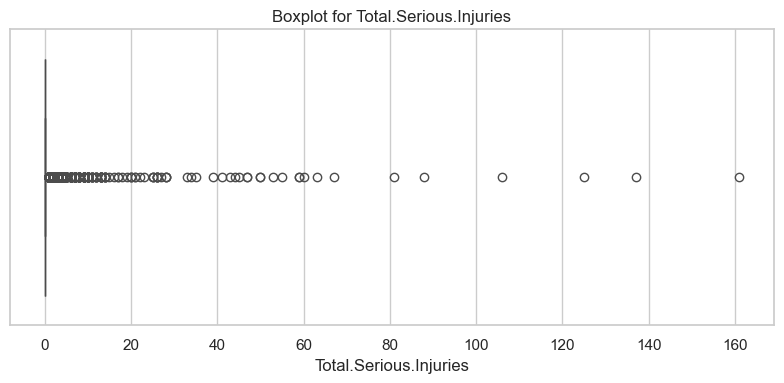

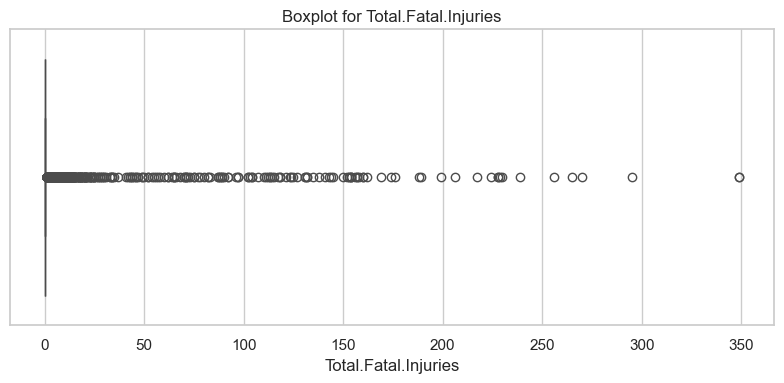

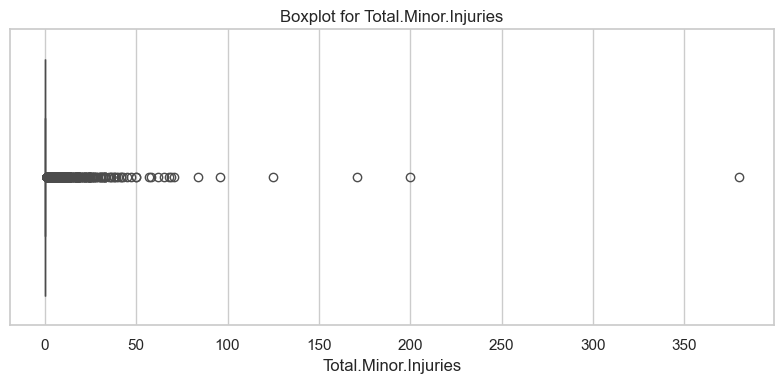

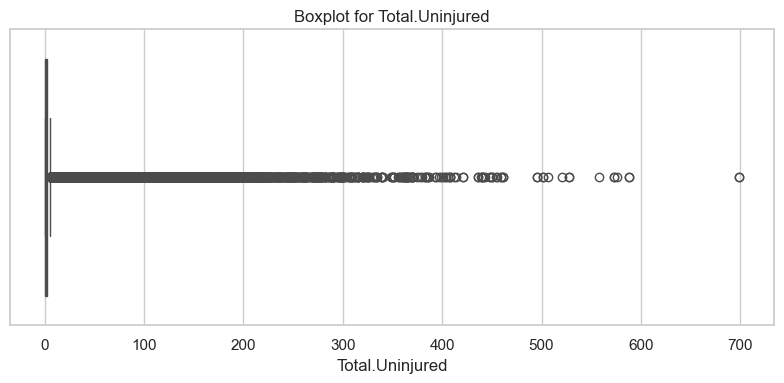

In [203]:
# Identify numerical columns
numerical_cols = [
    'Total.Serious.Injuries',
    'Total.Fatal.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall style for better visuals
sns.set(style="whitegrid")

# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

I’ve chosen to retain the outliers in this analysis, as they may represent genuine events. Removing them could distort the overall findings or hide important insights

## Exploratory Data Analysis(EDA)
Let's explore accident patterns based on aircraft type, time, phase of flight, weather conditions and more.

#### Average Fatalities per Aircraft Make

In [204]:
# Average fatalities per make
df.groupby('Make')['Total.Fatal.Injuries'].mean().sort_values(ascending=False)

Make
Tupolev                           127.25
Viking Air Limited                 23.00
Aviocar Casa                       18.00
Mil                                13.00
Mil Design Bureau                  13.00
                                   ...  
Lane Progressive Aerodyne, Inc      0.00
Landry                              0.00
Landrum Kelly T                     0.00
Landoll                             0.00
Zwicker Murray R                    0.00
Name: Total.Fatal.Injuries, Length: 7575, dtype: float64

Observation:
Tupolev has the highest average fatalities (127.25 deaths per accident), suggesting it's involved in extremely deadly accidents, even if not frequently.
Other aircraft like Mil, Viking Air, and Aviocar Casa also have high fatality averages despite relatively few accidents.

Recommendation:
Avoid aircraft makes with high average fatalities, especially if they're involved in commercial or passenger operations. These types suggest design, maintenance, or operational risks that could lead to mass-casualty events

#### Number of Accidents by Severity Level

In [205]:
# Count accidents by severity level
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     68267
Fatal(1)       6151
Fatal          5248
Fatal(2)       3697
Incident       2202
              ...  
Fatal(88)         1
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

Most accidents are not fatal, which is encouraging

#### Trends of Injuries Over The Years

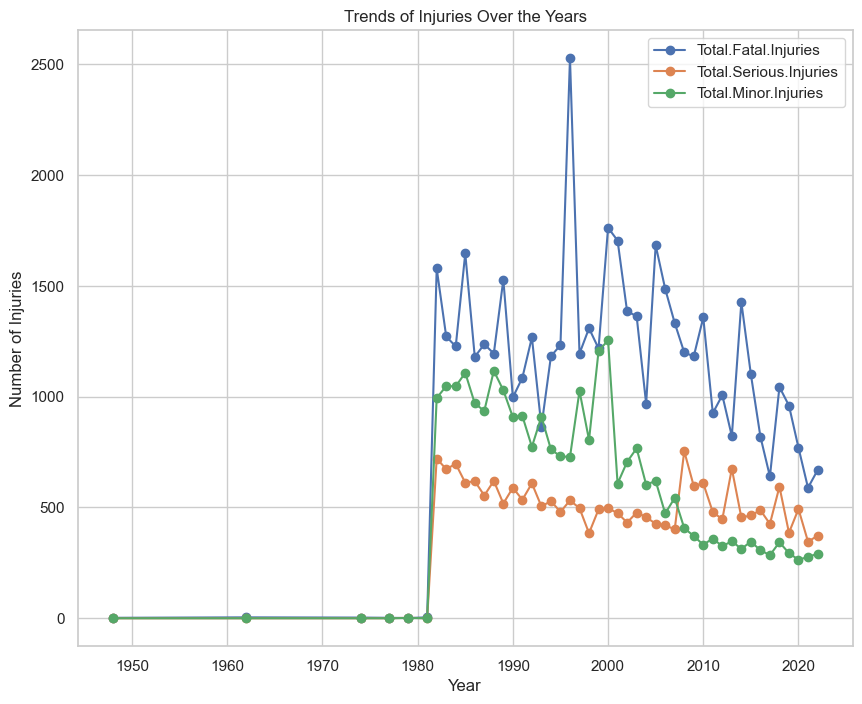

In [206]:
# Groups the data by year and sums up the total number of fatal, serious, and minor injuries.
injuries_per_year = df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot all three injury types on a single line chart to show how they have changed over time.
injuries_per_year.plot(kind='line', marker='o', figsize=(10,8))
plt.title('Trends of Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

Conclusion: From 1980 onwards there was fatal, serious, and minor injuries due to aircraft accidents showed a general downward trend. There was a peak in fatalities in the mid-1990s to early 2000s, but after that, all injury types gradually decreased. This indicates that aviation safety has improved over time, with fewer severe injuries occurring in recent years.

Recommendation: Invest in aircraft types or technologies that emerged after 2010, as they are associated with fewer and less severe accidents.

#### Top 10 Aircraft Makes Involved in Accidents

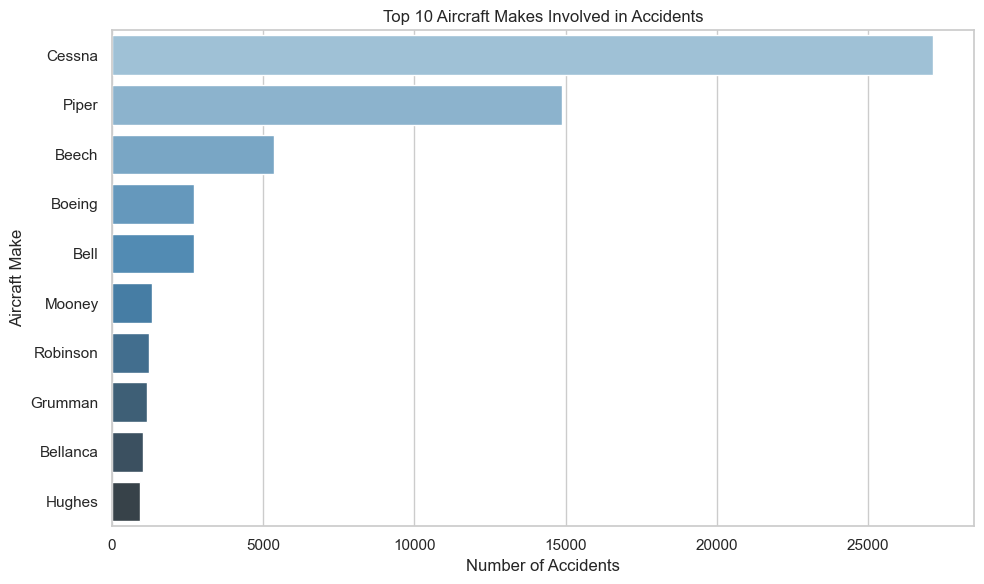

In [207]:
# Get the 10 most common aircraft makes involved in accidents
top_makes = df['Make'].value_counts().head(10)

# Plot a horizontal bar chart to visualize accident counts by aircraft make
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='Blues_d')
plt.title("Top 10 Aircraft Makes Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()

Coclusion: Cessna and Piper have the highest number of recorded accidents, which is expected given how widely they're used in general aviation. The high numbers reflect popularity, not necessarily poor safety

Recommendation: Don’t judge safety by accident counts alone. Look at accident severity and usage rates. Cessna and Piper may still be smart, low-risk choices for investment

#### Fatal Injuries by Top 5 Aircraft Make using Boxplot

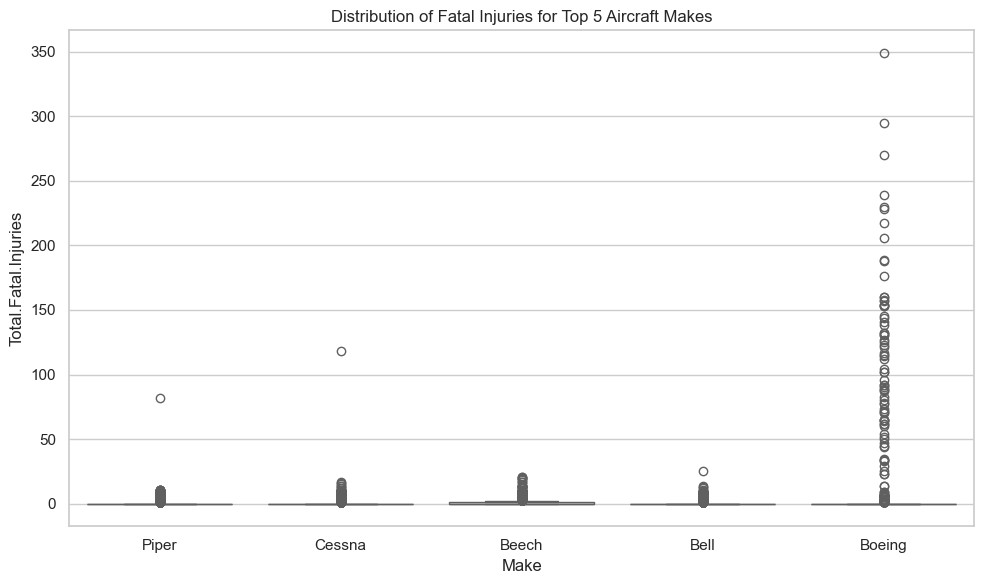

In [208]:
# Select top 5 aircraft makes for comparison
top5_makes = df['Make'].value_counts().head().index

# Boxplot shows the distribution of fatal injuries for each make
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['Make'].isin(top5_makes)], x='Make', y='Total.Fatal.Injuries', palette='coolwarm')
plt.title("Distribution of Fatal Injuries for Top 5 Aircraft Makes")
plt.tight_layout()
plt.show()

Conclusion: Boeing accidents tend to involve far more fatalities than other makes, likely because they carry more passengers. In contrast, Cessna and Piper show much lower fatality counts per accident.

Recommendation: Focus on aircraft with lower fatality severity like Cessna and Piper for safer, small-scale operations. Don’t just count accidents consider how deadly they are.

#### Accidents by top 10 locations

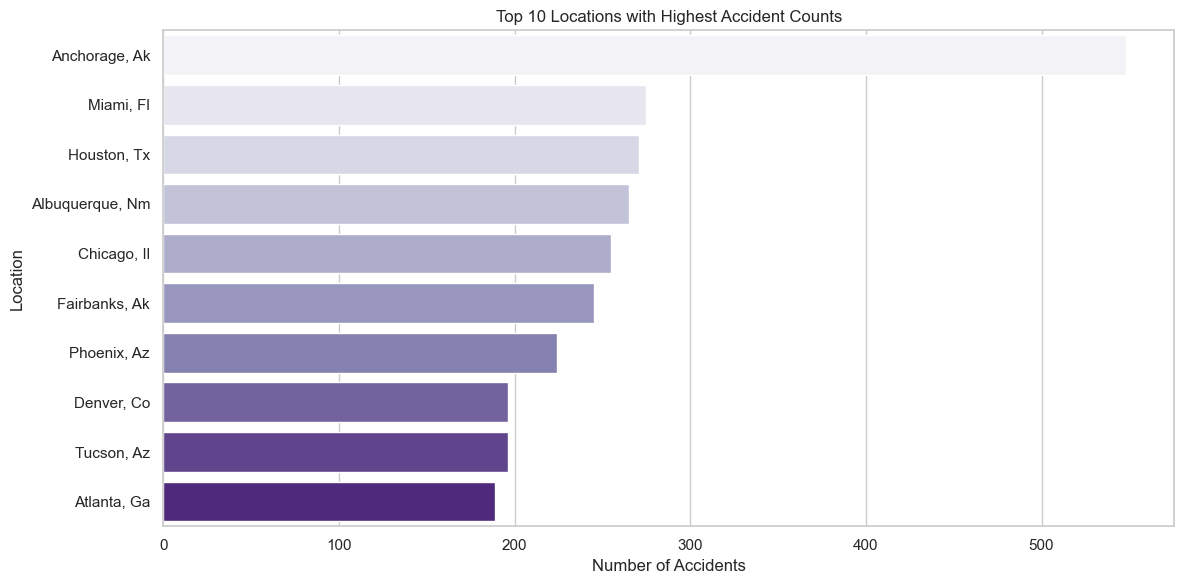

In [209]:
# Get top 10 locations with the highest accident counts
top_locations = df['Location'].value_counts().head(10)

# Visualize the number of accidents per location
plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Purples')
plt.title("Top 10 Locations with Highest Accident Counts")
plt.xlabel("Number of Accidents")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

Observation: Anchorage, AK is by far the leading location for aircraft accidents, followed by cities like Miami and Houston. These are high-traffic or geographically challenging areas, possibly with weather complications. They are hotspots for accident frequency.

Recommendation: Conduct location risk assessments before basing operations or investments in accident prone cities. Use this insight to either avoid high risk or strengthen safety protocols in these areas

#### Average Severe Injuries by Engine Type

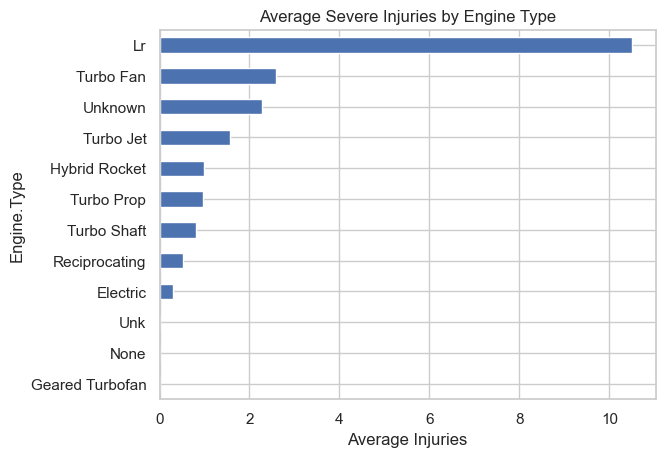

In [210]:
# Create a new column called 'Total_Severe' by combining fatal and serious injuries.
df['Total_Severe'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']
# Calculate the average number of severe injuries for each engine type.
df.groupby('Engine.Type')['Total_Severe'].mean().sort_values().plot(kind='barh')
# Plot the results as a horizontal bar chart to compare which engine types tend to have more severe injuries on average.
plt.title("Average Severe Injuries by Engine Type")
plt.xlabel("Average Injuries")
plt.show()

#### Engine type frequency

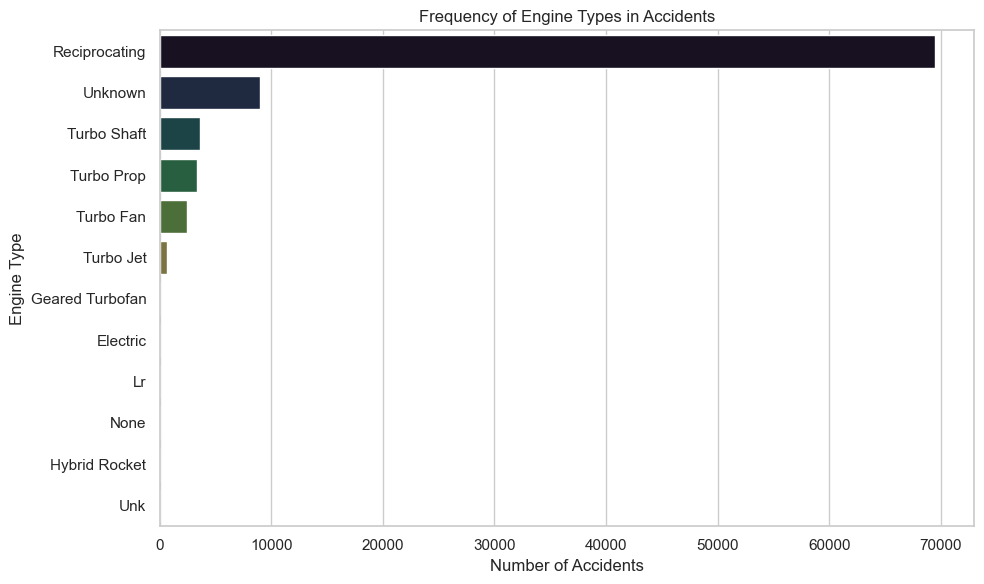

In [211]:
# Count how many times each engine type appears in the dataset
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Engine.Type', order=df['Engine.Type'].value_counts().index, palette='cubehelix') # Use a color palette for visual appeal.
plt.title("Frequency of Engine Types in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Engine Type")
plt.tight_layout()
plt.show()

Coclusion: Reciprocating engines have the highest injury rates due to older technology and more mechanical issues. Turbofan and turbojet engines used in commercial jets are the safest.

Recommendation:
If you're flying commercially, choose turbofan-powered jets.
If using small piston aircraft, prioritize rigorous maintenance and strong pilot training.

#### Total Fatal Injuries by Purpose of Flight

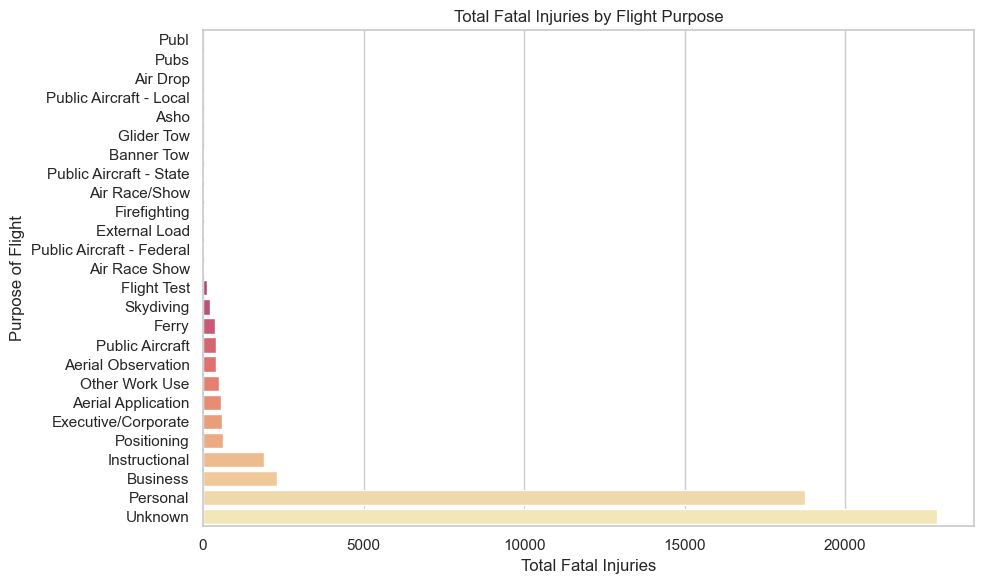

In [212]:
# Group by flight purpose and sum total fatal injuries
purpose_fatal = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values()

# Visualize which flight purposes are associated with more fatalities
plt.figure(figsize=(10,6))
sns.barplot(x=purpose_fatal.values, y=purpose_fatal.index, palette='magma')
plt.title("Total Fatal Injuries by Flight Purpose")
plt.xlabel("Total Fatal Injuries")
plt.ylabel("Purpose of Flight")
plt.tight_layout()
plt.show()


Conclusion: Personal and Business have the highest fatality rates. Corporate and instructional flights are the safest.

Recommendation: Start with corporate or charter operations. Postpone high-risk missions until safety systems are fully established.

#### Correlation between Injury Types
Discover how different types of injuries are related. For example, do serious injuries often co-occur with fatalities

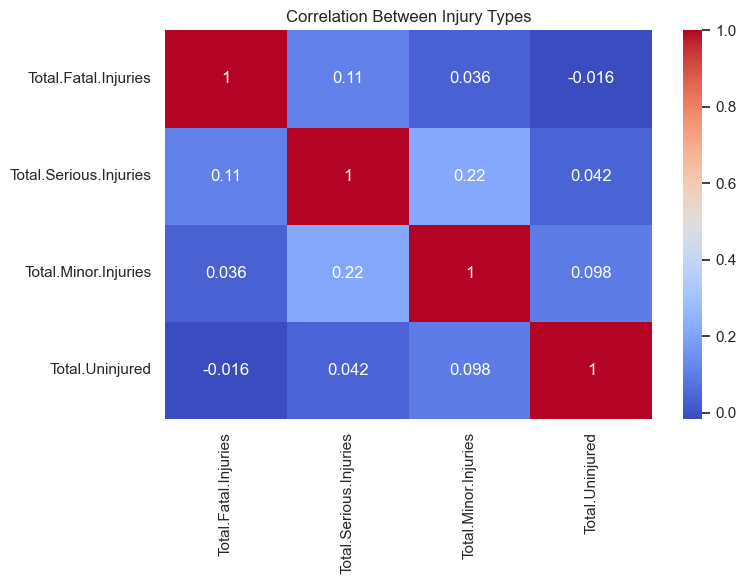

In [213]:
# Select numerical injury-related columns
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Generate a heatmap showing how each type of injury correlates with others
plt.figure(figsize=(8,6))
sns.heatmap(df[injury_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Injury Types")
plt.tight_layout()
plt.show()

Conclusion: There’s little to no correlation between different injury types. Fatal, serious, and minor injuries don’t predict one another. Some data entries also appear duplicated or mislabeled, raising quality concerns.

Recommendation: Treat each injury type as a separate risk when analyzing causes.

#### Number of Accidents by Weather Condition
Understand the role of weather.

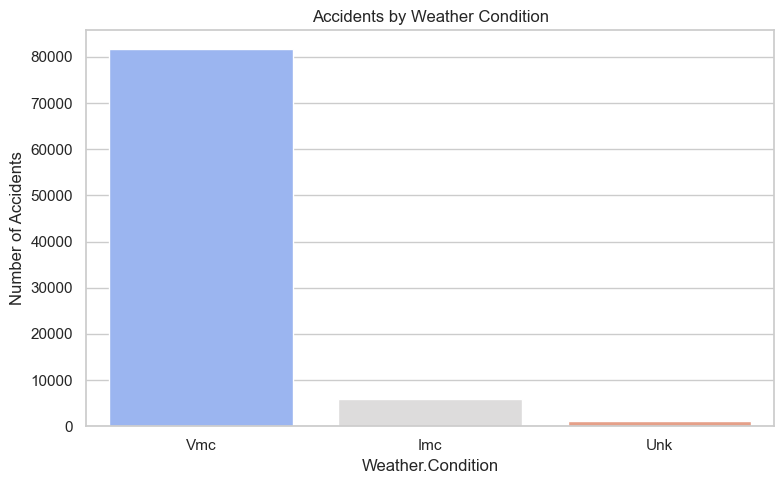

In [214]:
# Compare number of accidents under different weather conditions
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Weather.Condition', 
              order=df['Weather.Condition'].value_counts().index,
              palette='coolwarm')
plt.title('Accidents by Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

Conclusion: Most accidents occurred during clear (VMC) weather, likely due to more flights operating in such conditions. The low number of "unknown" entries may point to reporting gaps, not lower risk

Recommendation: Equip pilots with better weather monitoring tools, train for adverse conditions, and strengthen reporting systems to reduce “unknown” phase accidents and support long-term safety improvements.


#### Top 10 Aircraft Models by Fatal Injuries

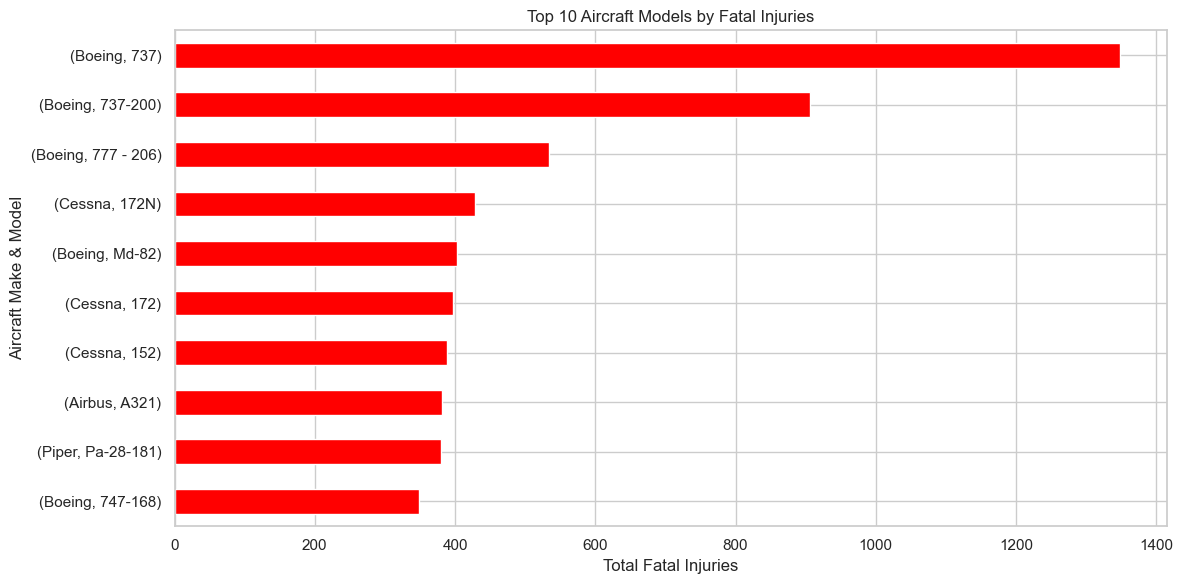

In [215]:
# Group by Make and Model to get total fatal injuries
top_fatal_models = df.groupby(['Make', 'Model'])['Total.Fatal.Injuries'] \
                     .sum().sort_values(ascending=False).head(10)

# Plot the top 10 aircraft models with the highest fatal injuries
plt.figure(figsize=(12, 6))
top_fatal_models.plot(kind='barh', color='red')
plt.title('Top 10 Aircraft Models by Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Make & Model')
plt.gca().invert_yaxis()  # show highest at top
plt.tight_layout()
plt.show()

Conclusion: Aircraft like the Boeing 737 & 777 show strong fatal injuries.Most commonly used makes are Boeing and Cessna hence it has highest number of records. 
    
Recommendation: Avoid the specific make and models above since it has recorded largest volumes of fatal injuries

#### Accidents by Broad Phase of Flight
When do most accidents happen?

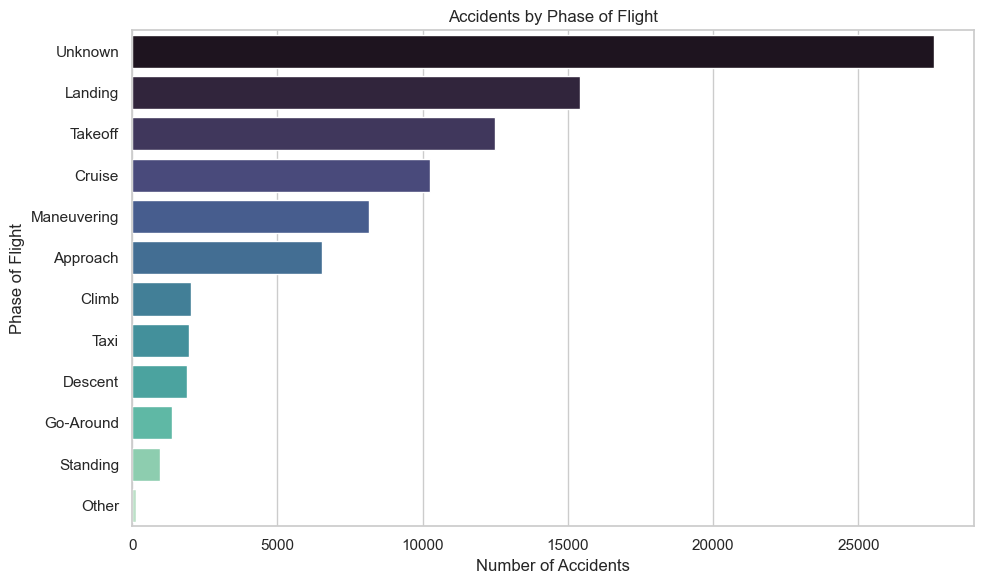

In [216]:
# Plot the number of accidents during each phase of flight.
# The phases are sorted from most to least frequent based on how often they appear in the data.
plt.figure(figsize=(10, 6))
sns.countplot(y='Broad.phase.of.flight', data=df, order=df['Broad.phase.of.flight'].value_counts().index, palette='mako')
plt.title('Accidents by Phase of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.tight_layout()
plt.show()

Observation: Most accidents occur during landing and takeoff critical flight phases. Cruise and maneuvering phases also show high incident numbers. Unknown phase is extremely high likely due to poor data recording which could distort trend analysis

Recommendation: Focus safety investments on automation, pilot training, and control technologies during landing and takeoff. Additionally, encourage improved accident reporting to reduce the "Unknown" category for better decision-making

### Exporting Data for Visualization

In [ ]:
# Relevant columns for analysis and visualization
columns_to_export = [
    'Event.Date',
    'Accident.Number',
    'Location',                   
    'Country',                   
    'Make',                       
    'Model',                      
    'Engine.Type',              
    'Aircraft.damage',           
    'Injury.Severity',          
    'Total.Fatal.Injuries',      
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Purpose.of.flight',       
    'Broad.phase.of.flight',    
    'Weather.Condition',
]

df_to_export = df[columns_to_export]
# Export to Excel
df_to_export.to_excel('Aviation_Cleaned_DataSet.xlsx', index=False)

## Conclusion
Aviation safety depends heavily on aircraft type, mission purpose, and engine design. Turbine engines are safer than piston types, and different injury levels require separate safety strategies. This analysis helps us reduce risk while growing operations wisely

## Recommendations
1.Choose Aircraft with Strong Safety Records and Reliable Engines
Prioritize proven models like the Cessna, especially those equipped with turboprop or modern reciprocating engines known for safety and durability. Pairing a reliable airframe with a trusted engine type helps reduce operational risk and maintenance issues.

2.Expand Pilot Training Beyond Takeoff and Landing
Accidents during cruise and maneuvering phases highlight the need for full-flight training that builds awareness and sharp decision-making.

3.Improve Weather Readiness and Reporting
Since many accidents involve bad weather or missing data, invest in weather tools, train for poor conditions, and ensure accurate incident reporting to close safety gaps.
